In [2]:
# generate a vector of random numbers which obeys the given distribution.
#
# n: length of the vector
# mu: mean value
# sigma: standard deviation.
# dist: choices for the distribution, you need to implement at least normal 
#       distribution and uniform distribution.
#
# For normal distribution, you can use ``numpy.random.normal`` to generate.
# For uniform distribution, the interval to sample will be [mu - sigma/sqrt(3), mu + sigma/sqrt(3)].
from __future__ import division
import numpy as np
import math

def generate_random_numbers(n, mu, sigma, dist="normal"):
    # write your code here.
    if dist == "normal":
        return np.random.normal(mu, sigma, n)
    elif dist == "uniform":
        
        return np.random.uniform(mu - sigma/math.sqrt(3), mu + sigma/math.sqrt(3), n)
    else:
        raise Exception("The distribution {unknown_dist} is not implemented".format(unknown_dist=dist))
        
        
# test your code:
y_test = generate_random_numbers(5, 0, 0.1, "normal")


In [11]:
y1 = generate_random_numbers(105, 0.5, 1.0, "normal")
y2 = generate_random_numbers(105, 0.5, 1.0, "uniform")
x0 = 0
#yk = 1/(k+1)  step length 


In [17]:
def IGD_wr_task1(y):
    n = len(y)
    ordering = np.random.choice(n, n, replace=True)
    #print(ordering)
    x0 = 0
    xk = x0
    Listobj = []
    # implement the algorithm's iteration of IGD. Your result should return the the final xk
    # at the last iteration and also the history of objective function at each xk.        
    for i in range(n):
        target = y[ordering[i]]
        gama = 1/ (i + 1)
        xk = xk - gama*(xk - target)
        objk = 0
        for j in y:
            objk += (xk - j)**2
        objk = objk/2
        Listobj.append(objk)  
    return xk, Listobj

xk1 ,Listobj1 = IGD_wr_task1(y1)
print(Listobj1)
xk2 ,Listobj2 = IGD_wr_task1(y2)


def IGD_wo_task1(y):
    n = len(y)
    ordering = np.random.choice(n, n, replace=False)
    #print(ordering)
    Listx = []
    Listobj = []
    x0 = 0
    xk = x0
    # implement the algorithm's iteration of IGD. Your result should return the the final xk
    # at the last iteration and also the history of objective function at each xk.
    for i in range(n):
        target = y[ordering[i]]
        gama = 1/ (i + 1)
        xk = xk - gama*(xk - target)
        Listx.append(xk)
        objk = 0
        for j in y:
            objk += (xk - j)**2
        objk = objk/2
        Listobj.append(objk)       
    return xk, Listobj #Listx

xk1_no ,Listobj1_no = IGD_wo_task1(y1)
print(Listobj1_no)
xk2_no ,Listobj2_no = IGD_wo_task1(y2)


[62.5109578800883, 72.98956175219752, 59.1997992722743, 51.95421657861629, 52.69784212693717, 54.30319135107941, 57.06415961425327, 65.46846732454725, 62.966861447844344, 58.44690310099574, 56.5524951610868, 57.26966515065704, 56.71314082203979, 58.77438064444743, 64.97565551276865, 62.01962426455185, 60.08711794130243, 57.31499650230452, 56.755354673367876, 57.3502553697814, 55.71813810760009, 54.57188497402103, 53.820543253619356, 54.037456570416595, 54.72375788395315, 54.50374881158697, 54.88564322299277, 53.73364821827157, 54.004851300300736, 53.87404930291303, 53.69230229951093, 54.1714232610293, 54.32885488210029, 53.318336884379704, 53.609940837131745, 54.13227851776307, 55.38120433822611, 55.66243725098947, 54.89261521065361, 53.47730111803191, 53.937360813996335, 54.082629598168815, 54.72127956843915, 54.46515767381604, 53.408756910314814, 53.23851343380777, 52.960786579496705, 52.3440964044536, 52.89279159582353, 52.60131870830616, 52.734440208525605, 52.61056909141334, 52.50

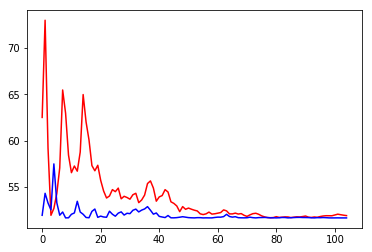

In [18]:
import matplotlib.pyplot as plt

plt.plot(np.arange(105), Listobj1, 'r')
plt.plot(np.arange(105), Listobj1_no, 'b')
plt.show()


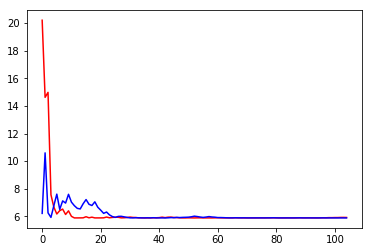

In [19]:
plt.plot(np.arange(105), Listobj2, 'r')
plt.plot(np.arange(105), Listobj2_no, 'b')
plt.show()


In [21]:
def IGD_wr_task2(y):
    n = len(y)
    ordering = np.random.choice(n, n, replace=True)
    #print(ordering)
    x0 = 0
    xk = x0
    Listobj = []
    beta_lst = np.random.uniform(1, 2, n)
    gama = 0.95/np.min(beta_lst)
    for i in range(n):
        target = y[ordering[i]]
        beta = beta_lst[ordering[i]]
        gama = 1/ (i + 1)
        xk = xk - gama*(xk - target)
        objk = 0
        for j in beta_lst:
            objk += j*(xk - target)**2
        objk = objk/2
        Listobj.append(objk)  
    return xk, Listobj

xk1 ,Listobj1 = IGD_wr_task2(y1)

xk2 ,Listobj2 = IGD_wr_task2(y2)


def IGD_wo_task2(y):
    n = len(y)
    ordering = np.random.choice(n, n, replace=False)
    #print(ordering)
    x0 = 0
    xk = x0
    Listobj = []
    beta_lst = np.random.uniform(1, 2, n)
    gama = 0.95/np.min(beta_lst)
    for i in range(n):
        target = y[ordering[i]]
        beta = beta_lst[ordering[i]]
        gama = 1/ (i + 1)
        xk = xk - gama*(xk - target)
        objk = 0
        for j in beta_lst:
            objk += j*(xk - target)**2
        objk = objk/2
        Listobj.append(objk)  
    return xk, Listobj

xk1_no ,Listobj1_no = IGD_wo_task2(y1)

xk2_no ,Listobj2_no = IGD_wo_task2(y2)



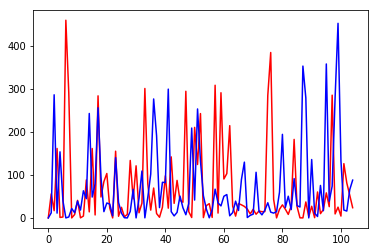

In [22]:
plt.plot(np.arange(105), Listobj1, 'r')
plt.plot(np.arange(105), Listobj1_no, 'b')
plt.show()

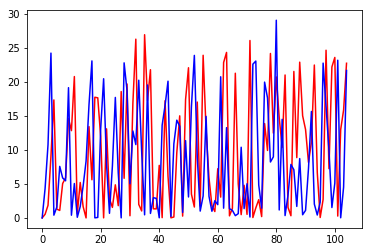

In [23]:
plt.plot(np.arange(105), Listobj2, 'r')
plt.plot(np.arange(105), Listobj2_no, 'b')
plt.show()